<a href="https://colab.research.google.com/github/dassatabdi24/Geo-Machine-Learning/blob/master/GDAL_Rasterio_ShapefileMaskout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install rasterio

     |████████████████████████████████| 18.1MB 1.2MB/s 


In [0]:
import os, fnmatch
from subprocess import call
call(["ls", "-l"])

inFolder= '/gdrive/My Drive/Dataset'
outFolder= '/gdrive/My Drive/Dataset/bgd_admbnda_adm0_bbs_20180410'
shp = '/gdrive/My Drive/Dataset/bgd_admbnda_adm0_bbs_20180410/bgd_admbnda_adm0_bbs_20180410.shp'
os.chdir (inFolder)

def findRasters (path, filter):
    for root, dirs, files in os.walk(path, filter):
        for file in fnmatch.filter(files, filter):
            yield os.path.join (root, file)

for raster in findRasters (inFolder, '*.tif'):
    (infilepath, infilename)= os.path.split (raster)
    print(infilename)
    outRaster= outFolder+ 'clip_'+ infilename
    print(outRaster)
    warp= 'gdalwarp -cutline \'%s\' -crop_to_cutline -dstalpha \'%s\' \'%s\'' % (shp, raster, outRaster)
    os.system(warp)

F182010.v4d_web.stable_lights.avg_vis.tif
/gdrive/My Drive/Dataset/bgd_admbnda_adm0_bbs_20180410clip_F182010.v4d_web.stable_lights.avg_vis.tif
clip_F182010.v4d_web.stable_lights.avg_vis.tif
/gdrive/My Drive/Dataset/bgd_admbnda_adm0_bbs_20180410clip_clip_F182010.v4d_web.stable_lights.avg_vis.tif
clip_F182010.v4d_web.stable_lights.avg_vis.tif
/gdrive/My Drive/Dataset/bgd_admbnda_adm0_bbs_20180410clip_clip_F182010.v4d_web.stable_lights.avg_vis.tif
clip_clip_F182010.v4d_web.stable_lights.avg_vis.tif
/gdrive/My Drive/Dataset/bgd_admbnda_adm0_bbs_20180410clip_clip_clip_F182010.v4d_web.stable_lights.avg_vis.tif


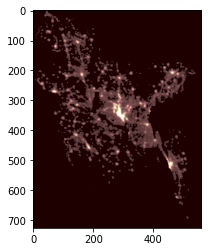

In [0]:


from matplotlib import pyplot
src = rasterio.open('/gdrive/My Drive/Dataset/bgd_admbnda_adm0_bbs_20180410/clip_F182010.v4d_web.stable_lights.avg_vis.tif')
pyplot.imshow(src.read(1), cmap='pink')
pyplot.show()

In [0]:
!pip install gdal

In [0]:
import os
import glob
import subprocess
import numpy as np
import pandas as pd
import datetime as dt
from pandas.tseries.offsets import *
import seaborn as sns
from osgeo import gdal
from IPython.display import display

import matplotlib.cm as cm
import matplotlib.pylab as plt
%matplotlib inline

In [0]:

path = "/gdrive/My Drive/Dataset/bgd_admbnda_adm0_bbs_20180410/clip_F182010.v4d_web.stable_lights.avg_vis.tif"

#read geotiff image
ds = gdal.Open(path)
#extract light intensity data
img = np.array(ds.GetRasterBand(1).ReadAsArray())
#formatting light intensity data
arr = img.reshape((1,img.size))

print(img.shape)
print(img.dtype)
print(img.size)

(725, 561)
uint8
406725


In [0]:
def read_img(path):
    ds = gdal.Open(path)
    img = np.array(ds.GetRasterBand(1).ReadAsArray())
    #print(img.dtype)
    return img

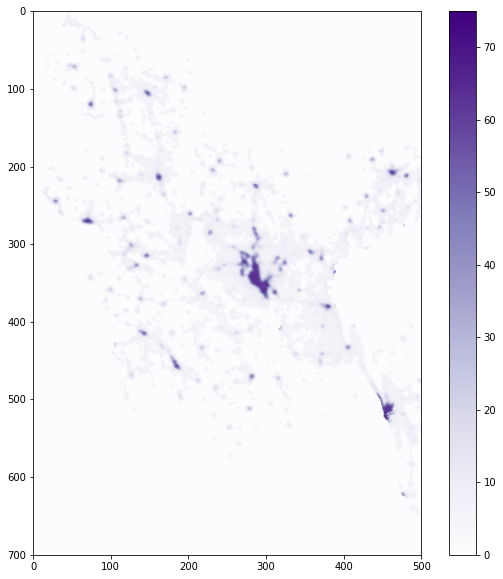

In [0]:

img = read_img(path)

plt.figure(figsize = (10,10))
plt.xlim(0,500)
plt.ylim(700,0)

plt.imshow(img, clim=(0, 75), cmap='Purples')
plt.colorbar()
plt.show()

In [0]:
import struct
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from osgeo import gdal_array
from osgeo.gdalconst import *
import matplotlib.pyplot as plt